주요 단계
회귀 분석:

독립 변수: 하루30분이상운동
종속 변수: BMI
남학생과 여학생 데이터를 각각 사용하여 회귀 분석 수행.
잔차의 가정 검토:

정규성: Q-Q Plot과 Shapiro-Wilk Test로 잔차가 정규성을 따르는지 확인.
등분산성: Breusch-Pagan Test로 잔차가 등분산성을 만족하는지 검정.
시각화:

회귀선을 포함한 산점도로 관계를 시각적으로 확인.
결과 확인
잔차의 정규성: p-value가 0.05보다 작으면 잔차가 정규성을 따르지 않음을 의미.
등분산성: p-value가 0.05보다 크면 잔차가 등분산성을 만족함.
회귀선 시각화: 운동 빈도와 BMI의 관계를 각 성별별로 확인.

In [5]:
import pandas as pd

file_path = '/Users/sim-yujin/Desktop/2-2 과목/통계적 데이터 분석/팀프로젝트/team-project/data/school_health.csv'

try:
    data = pd.read_csv(file_path, encoding='utf-8')
    print("데이터 로드 성공!")
except FileNotFoundError:
    print("파일을 찾을 수 없습니다. 경로를 확인하세요.")


print(data[['하루30분이상운동']].isnull().sum())

cleaned_data = data.dropna(subset=['BMI', '하루30분이상운동'])
print(f"Cleaned data size: {cleaned_data.shape}")

# 성별로 데이터 분리
male_data = cleaned_data[cleaned_data['성별'] == '남']
female_data = cleaned_data[cleaned_data['성별'] == '여']



데이터 로드 성공!
하루30분이상운동    39684
dtype: int64
Cleaned data size: (53038, 114)


In [7]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
from scipy.stats import shapiro

rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

# 성별 데이터를 나눔
male_data = cleaned_data[cleaned_data['성별'] == '남']
female_data = cleaned_data[cleaned_data['성별'] == '여']

# 1. 남학생 회귀 분석
male_X = sm.add_constant(male_data['하루30분이상운동'])  # 독립 변수
male_y = male_data['BMI']  # 종속 변수
male_model = sm.OLS(male_y, male_X).fit()

print("[남학생 회귀 분석 결과]")
print(male_model.summary())

# 2. 여학생 회귀 분석
female_X = sm.add_constant(female_data['하루30분이상운동'])  # 독립 변수
female_y = female_data['BMI']  # 종속 변수
female_model = sm.OLS(female_y, female_X).fit()

print("\n[여학생 회귀 분석 결과]")
print(female_model.summary())

# 3. 성별 포함 다중 회귀
cleaned_data['성별코드'] = cleaned_data['성별'].map({'남': 0, '여': 1})  # 성별을 숫자로 변환
multi_X = sm.add_constant(cleaned_data[['하루30분이상운동', '성별코드']])
multi_y = cleaned_data['BMI']
multi_model = sm.OLS(multi_y, multi_X).fit()

print("\n[성별 포함 다중 회귀 분석 결과]")
print(multi_model.summary())


[남학생 회귀 분석 결과]
                            OLS Regression Results                            
Dep. Variable:                    BMI   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.282
Date:                Thu, 05 Dec 2024   Prob (F-statistic):              0.258
Time:                        21:19:47   Log-Likelihood:                -76434.
No. Observations:               26968   AIC:                         1.529e+05
Df Residuals:                   26966   BIC:                         1.529e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.5514      0.061    3

/var/folders/qz/d378mfsj25g7bb288v8ls9yw0000gn/T/ipykernel_27451/1987268173.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['성별코드'] = cleaned_data['성별'].map({'남': 0, '여': 1})  # 성별을 숫자로 변환


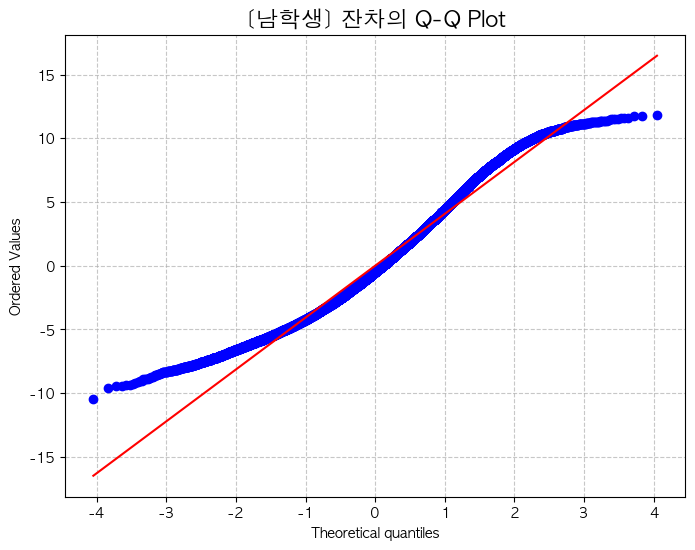

[남학생] 잔차 정규성 검정: W-Statistic = 0.9762, p-value = 0.0000
 -> 잔차는 정규성을 따르지 않습니다.

[남학생] 잔차 등분산성 검정 (Breusch-Pagan Test): p-value = 0.0000
 -> 잔차는 등분산성을 만족하지 않습니다.



/Users/sim-yujin/anaconda3/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 26968.
  res = hypotest_fun_out(*samples, **kwds)


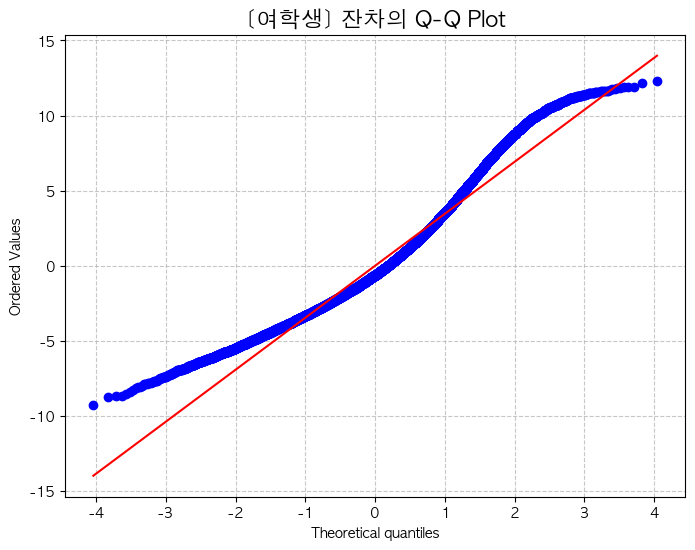

/Users/sim-yujin/anaconda3/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 26070.
  res = hypotest_fun_out(*samples, **kwds)


[여학생] 잔차 정규성 검정: W-Statistic = 0.9585, p-value = 0.0000
 -> 잔차는 정규성을 따르지 않습니다.

[여학생] 잔차 등분산성 검정 (Breusch-Pagan Test): p-value = 0.0790
 -> 잔차는 등분산성을 만족합니다.



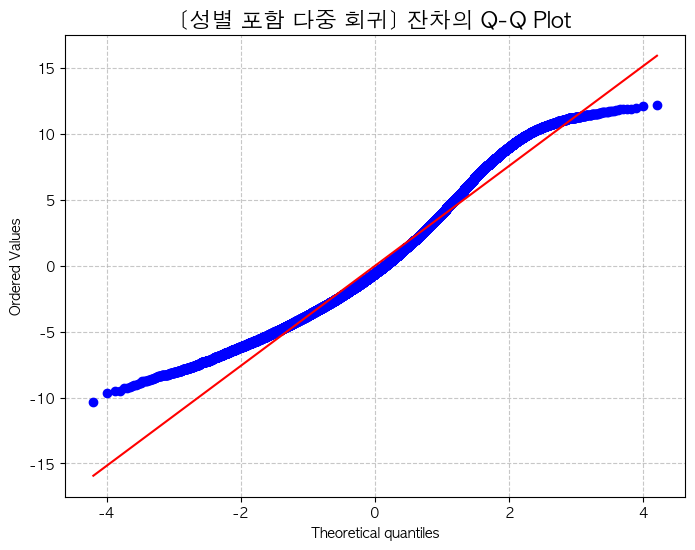

[성별 포함 다중 회귀] 잔차 정규성 검정: W-Statistic = 0.9718, p-value = 0.0000
 -> 잔차는 정규성을 따르지 않습니다.

[성별 포함 다중 회귀] 잔차 등분산성 검정 (Breusch-Pagan Test): p-value = 0.0000
 -> 잔차는 등분산성을 만족하지 않습니다.



/Users/sim-yujin/anaconda3/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 53038.
  res = hypotest_fun_out(*samples, **kwds)


In [8]:
from statsmodels.stats.diagnostic import het_breuschpagan

# 잔차 검정 함수
def check_residuals_normality(model, title):
    residuals = model.resid

    # Q-Q Plot
    plt.figure(figsize=(8, 6))
    stats.probplot(residuals, dist="norm", plot=plt)
    plt.title(f"{title} 잔차의 Q-Q Plot", fontsize=16)
    plt.grid(alpha=0.7, linestyle='--')
    plt.show()

    # Shapiro-Wilk Test
    stat, p = shapiro(residuals)
    print(f"{title} 잔차 정규성 검정: W-Statistic = {stat:.4f}, p-value = {p:.4f}")
    if p > 0.05:
        print(" -> 잔차는 정규성을 따릅니다.\n")
    else:
        print(" -> 잔차는 정규성을 따르지 않습니다.\n")

def check_homoscedasticity(model, X, title):
    _, pval, _, _ = het_breuschpagan(model.resid, X)
    print(f"{title} 잔차 등분산성 검정 (Breusch-Pagan Test): p-value = {pval:.4f}")
    if pval > 0.05:
        print(" -> 잔차는 등분산성을 만족합니다.\n")
    else:
        print(" -> 잔차는 등분산성을 만족하지 않습니다.\n")

# 남학생
check_residuals_normality(male_model, "[남학생]")
check_homoscedasticity(male_model, male_X, "[남학생]")

# 여학생
check_residuals_normality(female_model, "[여학생]")
check_homoscedasticity(female_model, female_X, "[여학생]")

# 다중 회귀
check_residuals_normality(multi_model, "[성별 포함 다중 회귀]")
check_homoscedasticity(multi_model, multi_X, "[성별 포함 다중 회귀]")


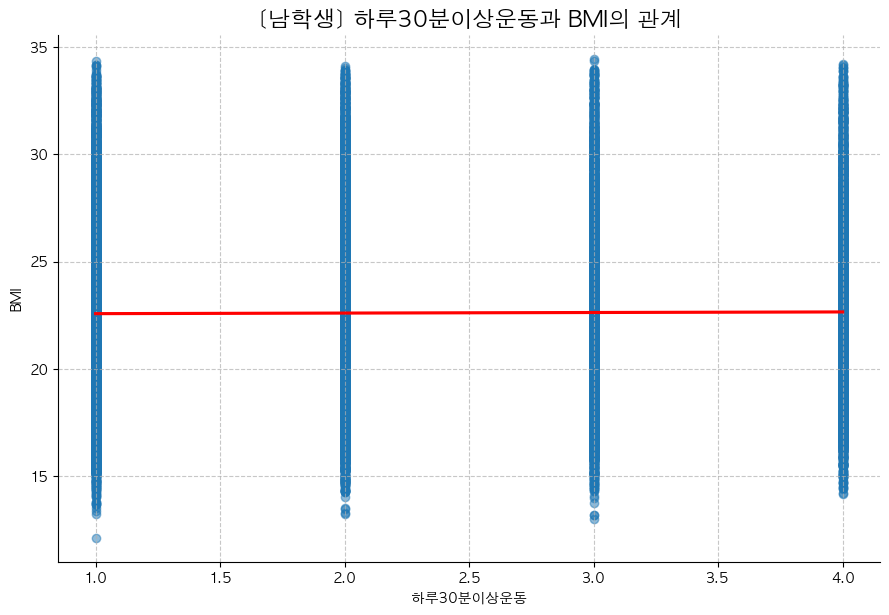

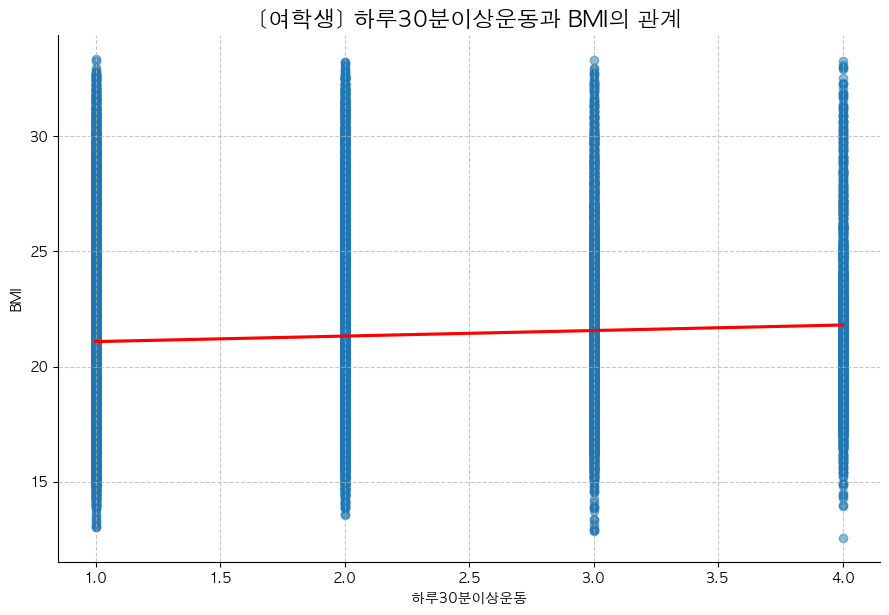

In [9]:
# 회귀선 시각화: 남학생
sns.lmplot(
    x='하루30분이상운동', 
    y='BMI', 
    data=male_data, 
    height=6, 
    aspect=1.5, 
    scatter_kws={'alpha': 0.5}, 
    line_kws={'color': 'red'}, 
    ci=None
)
plt.title("[남학생] 하루30분이상운동과 BMI의 관계", fontsize=16)
plt.grid(alpha=0.7, linestyle='--')
plt.show()

# 회귀선 시각화: 여학생
sns.lmplot(
    x='하루30분이상운동', 
    y='BMI', 
    data=female_data, 
    height=6, 
    aspect=1.5, 
    scatter_kws={'alpha': 0.5}, 
    line_kws={'color': 'red'}, 
    ci=None
)
plt.title("[여학생] 하루30분이상운동과 BMI의 관계", fontsize=16)
plt.grid(alpha=0.7, linestyle='--')
plt.show()


남학생:

하루 30분 이상 운동과 BMI 간의 관계는 통계적으로 유의미하지 않음.
잔차가 정규성을 따르지 않고, 등분산성도 만족하지 않음 → OLS(선형 회귀) 결과를 신뢰하기 어려움.

여학생:

하루 30분 이상 운동과 BMI 간의 관계는 통계적으로 유의미하지 않음.
잔차는 정규성을 따르지 않으나, 등분산성은 만족